In [1]:
# coding: UTF-8
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import pi, cos
from math import log10, floor, factorial
import pandas as pd
from collections import OrderedDict
from matplotlib.ticker import MultipleLocator
from pylab import *
from scipy.optimize import curve_fit
import scipy.integrate as integrate
import scipy.misc as mic
import pynverse 
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#file_id = sys.argv[1]
#file_id_str = str(file_id)
#title = str(sys.argv[3])

# Data table
data_matrix = pd.read_table('Karelle_revised_brokenOUTPUTfull.txt', sep=' ', names=('label','No','N80Mpc','N120Mpc','theta_c', 's', 'theta_obsGW'))



In [2]:
data_matrix

,label,No,N80Mpc,N120Mpc,theta_c,s,theta_obsGW
0,"1,2,1,1,-12,-30",3.380302e+06,9.496877e-08,2.010648e-07,1.000,3.612183,12.0
1,"1,2,1,1,-12,-29",1.532640e+06,1.258519e-07,2.904655e-07,1.611,4.470530,12.0
2,"1,2,1,1,-12,-28",8.890231e+05,1.543959e-07,3.777564e-07,2.223,5.323348,12.0
3,"1,2,1,1,-12,-27",5.863287e+05,1.813679e-07,4.637538e-07,2.833,6.218761,12.0
4,"1,2,1,1,-12,-26",4.182548e+05,2.072382e-07,5.490579e-07,3.445,7.192265,12.0
5,"1,2,1,1,-12,-25",3.148581e+05,2.322123e-07,6.337579e-07,4.055,8.274451,12.0
6,"1,2,1,1,-12,-24",2.463280e+05,2.565057e-07,7.181680e-07,4.667,9.504629,12.0
7,"1,2,1,1,-12,-23",1.985006e+05,2.801913e-07,8.022327e-07,5.278,10.927733,12.0
8,"1,2,1,1,-12,-22",1.636703e+05,3.034011e-07,8.861816e-07,5.889,12.610342,12.0
9,"1,2,1,1,-12,-21",1.374705e+05,3.261794e-07,9.699873e-07,6.500,14.641971,12.0


In [3]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#   astromomical parameters and the correction factors     |
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

c = 3.0*10**8   # [m/s]
H_o = 67.89/(3.0857*10**19) # [km/s/Mpc]*[Mpc/km]= [1/s]
Gpc = 3.0857*10**25 # [m/Gpc]
c_H_o = c/H_o/Gpc #[m]/[m/Gpc] = ~4.4[Gpc]
sample_number = 35.#float(sys.argv[2]) # number of sample SGRBs used for our analysis 
f_R = sample_number/107.# fraction of SGRBs used for analysis out of total SGRBs detected by Swfit during T = 12.6
f_FOV = 0.1 # field of veiw of Swift
T = 12.6 # observinng time for Swfit about our sample data 
r_nsns = 5./6. # ratio of NSNS over NSNS+NSBH
#r_nsns = 3./6. # this is a value for getting potential value 
log10LisoGW = 46.4615 # observed isotropic equivalent luminoisty of GRB170817A at a observed inclination angle 
log10typiL_iso = 50.36 # assumed on-axis isotropic equivalent luminosity of GRB170817A, which we assume a median of other SGRBs





In [4]:
def pickRF(dfmat2):
    '''
    It expects dfmats as an input
    It gives matrix in a form of pandas, choosing a RF
    Take average of LRD and calculate probability of the average value of LRD.
    USAGE: df = pickRF(data_matrix)
    '''
    RFnum = raw_input('which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:7')

    # take only a chosen RF 
    label_new = []
    No_new = []
    N80Mpc_new = []
    N120Mpc_new = [] 
    s_new = []
    theta_obsGW_new = []
    theta_c_new = []

    for ind in range(len(dfmat2['label'])):
        if dfmat2['label'][ind].split(',')[1] == RFnum:
            # take label only relevant to tmin, RF, theta_obsGW, theta_c
            label_tmin = dfmat2['label'][ind].split(',')[0]
            label_RF = dfmat2['label'][ind].split(',')[1]
            label_theta_obsGW = dfmat2['label'][ind].split(',')[4]
            label_theta_c = dfmat2['label'][ind].split(',')[5]
            modilabel = '%s,%s,%s,%s' %(label_tmin, label_RF, label_theta_obsGW, label_theta_c)
            label_new.append(modilabel)
            No_new.append(dfmat2['No'][ind])
            N80Mpc_new.append(dfmat2['N80Mpc'][ind])
            N120Mpc_new.append(dfmat2['N120Mpc'][ind])
            s_new.append(dfmat2['s'][ind])
            theta_obsGW_new.append(dfmat2['theta_obsGW'][ind])
            theta_c_new.append(dfmat2['theta_c'][ind])

    dfmat2RF = pd.DataFrame({'label':label_new,
                             'No':No_new,
                             'N80Mpc':N80Mpc_new,
                             'N120Mpc':N120Mpc_new,
                             's':s_new,
                             'theta_obsGW':theta_obsGW_new,
                             'theta_c':theta_c_new
                            })   

    # evaluate LF uncertainty 
    nonduplicatelabel = dfmat2RF.drop_duplicates('label')['label']
    Nomean = []
    Nostd = []
    N80Mpcmean = []
    N80Mpcstd = []
    N120Mpcmean = []
    N120Mpcstd = []
    for label in nonduplicatelabel:
        Nomean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['No']).mean())
        Nostd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['No']).std())
        N80Mpcmean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N80Mpc']).mean())
        N80Mpcstd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N80Mpc']).std())
        N120Mpcmean.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N120Mpc']).mean())
        N120Mpcstd.append(pd.to_numeric(dfmat2RF[(dfmat2RF['label']==label)]['N120Mpc']).std())

    df = pd.DataFrame({'label': nonduplicatelabel, 
                       'Nomean':Nomean, 
                       'Nostd':Nostd, 
                       'N80Mpcmean':N80Mpcmean,
                       'N80Mpcstd':N80Mpcstd,
                       'N120Mpcmean':N120Mpcmean,
                       'N120Mpcstd':N120Mpcstd,
                       'theta_c' : pd.to_numeric(dfmat2RF.drop_duplicates('label')['theta_c']),
                       's' : pd.to_numeric(dfmat2RF.drop_duplicates('label')['s']),
                       'theta_obsGW':pd.to_numeric(dfmat2RF.drop_duplicates('label')['theta_obsGW'])
                      })
    
    # local rate density [1/yr/Gpc^3]
    df['LRDmean'] = df['Nomean']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 
    df['LRDstd'] = df['Nostd']/(f_FOV*f_R*0.8*T)*c_H_o**(-3) 
    
    
    # split label 
    label_st = np.array(df['label'])
    label_tmin = []
    label_RF = []
    label_theta_obsGW = []
    label_theta_c = []
    for ind in range(len(label_st)):
        #print(label_st[ind].split(',')[0])
        label_tmin.append(label_st[ind].split(',')[0])
        label_RF.append(label_st[ind].split(',')[1])
        label_theta_obsGW.append(label_st[ind].split(',')[2])
        label_theta_c.append(label_st[ind].split(',')[3])

    # add splitted labels
    df['label_tmin']=label_tmin
    df['label_RF']=label_RF
    df['label_theta_obsGW']=label_theta_obsGW
    df['label_theta_c']=label_theta_c
    
    # Distribution for theta_c and s 
    # is the trancated Poisson distribution as these is the maximum value for theta_c
     
    return df 




### Distribution for theta_c 

In [5]:

    
def distribution_theta_c(df, tmin, theta_obsGW, r_nsns=r_nsns):
    '''
    Providing the distributio of theta_c with given df, t_min, theta_obsGW
    USAGE: P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=36)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. find Poisson(theta_c)
    3. find Jacobian dl/dtheta_c
    4. find the distribution of theta_c
    5. normalized that distribution to get the truncated distribution 
    6. find the median and the lower and upper bound of theta_c with 1-sigma
    '''
    # VT for NSNS in O2
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    #r_nsns = 5./6.
 
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
        
    def cda(f,x,h):
        '''
        find the 1st order derivative of a given function 
        '''
        return (f(x+h)-f(x-h))/(2*h)
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()

   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

    def avg(x):
        return sum(x)/float(len(x))

    def sst(x):
        sum=0.0
        xbar=avg(x)
        for i in range(len(x)):
            sum += (x[i]-xbar)**2
        return sum

    def ssr(x,y,model,params):
        sum = 0.0
        for i in range(len(y)):
            sum += (y[i] - model(x[i],*params))**2
        return sum

    def fitstats(fit, model):
        #Fit statistics
        fitparams=fit[0]
        cov=fit[1]                      #Covariance matrix
        dof=len(xdata)-len(fitparams)   #degrees of freedom
        chisqr=ssr(xdata,ydata,model,fitparams)     #chi-square is sum of squares of diagonal covariance
        errbars=20

        #Computer uncertainties in estimated parameters from covariance matrix and reduced chisqr
        del_params=[]
        for i in range(len(fitparams)):
            del_params.append(np.sqrt(cov[i,i]*np.sqrt(chisqr/dof)))

        return chisqr,del_params
    
     
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit = curve_fit(model, xdata, ydata)

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best(x, a=fit[0][0], b=fit[0][1], c=fit[0][2], d=fit[0][3], e=fit[0][4], f=fit[0][5]):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #+++++++++++++++++++++++++++
    # distribution of theta_c  |
    #+++++++++++++++++++++++++++
    
    def Poisson(k, f, x):
        '''
        Poisson distribution 
        x is expcted as number of NSNS events in O2
        '''
        output = (f(x))**k*np.exp(-f(x))/factorial(k)
        return output

    def P(x):
        '''
        distribution of theta_c
        given by multiplication of Poisson of theta_c and Jacobian
        '''
        result = Poisson(1, model_best, x)*(-1)*cda(model_best,x,h=0.01)
        return result 

    # integral of P upto theta_c = theta_obsGW
    def integral_P(lowerx, upperx):
        '''
        Integral of P(theta_c) from lowerx to upperx
        lowerx is expected theta_c =0 in principle but it gives numerical illness 
        so lowerx = theta_c =0.5, which is fine
        upper x is expected theta_c = theta_obsGW
        '''
        result, err = integrate.quad(lambda x: P(x), lowerx, upperx)
        return result
    
    # finding the normalization factor by integrating P(x) in x=[0.5, theta_obsGW]
    norm = integral_P(1, theta_obsGW)
    
    # truncated Poisson distribution of theta_c
    def P_normalized(x, normalization_factor=norm):
        '''
        distribution of theta_c normalized, i.e., truncated Poisson distribution
        such that integral of P(x) in x = [0.01, theta_obsGW] = 1
        theta_c > theta_obsGW is unphysical as s becomes negative value, i.e., it is divese jet.
        '''
        result = P(x)/normalization_factor
        return result 
        
    # for the median the lower and upper limit
    def integral_P_normalized(lowerx, upperx):
        '''
        integral of P_normalized from lowerx to upperx
        lowerx and upperx are expected as theta_c
        '''
        result, err = integrate.quad(lambda x: P_normalized(x), lowerx, upperx)
        return result
    

    # a function finding the median, lower and upper bounds of theta_c
    def confidential_theta_c(integral_from_left):
        '''
        for the median: integral_from_left = 0.5
        for the lower bound: integral_from_left = 0.16
        for the upper bound: integral_from_left = 0.84
        '''
        median_inv = pynverse.inversefunc(lambda t: integral_P_normalized(lowerx=0.5, upperx=t), domain=[0.5, theta_obsGW])
        output = median_inv(integral_from_left)
        return output

    

    # the median, the lower and upper bounds for theta_c with 1-sigma values
    median = confidential_theta_c(0.5)
    low_bd_theta_c = confidential_theta_c(0.16)
    upp_bd_theta_c = confidential_theta_c(0.84)

    
    # giving the distribution of theta_c and its peak, the lower and upper bounds
    return P_normalized, median, low_bd_theta_c, upp_bd_theta_c

    



### Distribution of s 

In [6]:
def distribution_s(df, tmin, theta_obsGW, r_nsns=r_nsns, log10LisoGW=log10LisoGW, log10typiL_iso=log10typiL_iso):
    '''
    param df: pandas  
    
    Providing the distributio of s with given df, t_min, theta_obsGW
    USAGE: P_s, med_s, low_bd_s, upp_bd_s, exp_s = distribution_theta_c(df, '1Gyr', theta_obsGW=36)
    (method)
    for s
    7. use the extrapolated relationship between l and theta_c
    8. combine it with the exact relationship of theta_c and s
    9. find l as a function of s
    10. find Jacobian dl/dtheta_c
    11. find the distribution of theta_c
    12. normalized that distribution to get the truncated distribution 
    13. find the median and the lower and upper bound of s with 1-sigma 
    '''
    
    
    # VT for NSNS  
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    #r_nsns = 5./6.
    
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
        
        
        
    def cda(f,x,h):
        '''
        find the 1st order derivative of a given function 
        '''
        return (f(x+h)-f(x-h))/(2*h)

    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()


    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit = curve_fit(model, xdata, ydata)

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best(x, a=fit[0][0], b=fit[0][1], c=fit[0][2], d=fit[0][3], e=fit[0][4], f=fit[0][5]):
        '''
        The phenominological model for NSNS events as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3


    #=================================================
    # distribution of s  |
    #=================================================
    '''
    Here it uses the extrapolated l as a funtiono of theta_c,
    while we have the exact relationship between theta_c and s
    So We can get l as a function of s
    '''


    def find_theta_c(s, theta_obsGW, log10LisoGW=log10LisoGW, log10typiL_iso=log10typiL_iso):
        '''
        this gives theta_c with given s and theta_obsGW
        Usege = theta_c = find_theta_c(s, theta_obsGW)
        '''
        out = theta_obsGW*10.**((log10LisoGW - log10typiL_iso)/s)
        return out 


    def find_l_with_s(s, theta_obsGW=theta_obsGW):
        '''
        number of NSNS events in O2 as a function of s
        Usage: l = find_l_with_s(s, theta_obsGW)
        '''
        theta_c = find_theta_c(s, theta_obsGW)
        out = model_best(theta_c)
        return out 

    def Poisson(k, f, x):
        '''
        Poisson distribution 
        x is expcted as number of NSNS events in O2
        '''
        output = (f(x))**k*np.exp(-f(x))/factorial(k)
        return output
    
    def P_s(s):
        '''
        the distribution of s
        this is the Poisson(s) times Jacobian dl/ds
        '''
        result = Poisson(1, find_l_with_s, s)*(-1)*cda(find_l_with_s, s, h=0.001)
        return result 
    
    
    def integral_P_s(lowerx, upperx):
        '''
        Integral of the distribution of s, P_s(s) from lowerx to uppperx
        lowerx is expected to be 2.5, it is ok as P_s dies down to be zero at s = 2.5
        upperx is expected to be np.inf
        '''
        result, err = integrate.quad(lambda x: P_s(x), lowerx, upperx)
        return result

    # normalization constant for the distribution of s
    norm_s = integral_P_s(2.5, np.inf)
    

    def P_s_normalized(x, normalization_factor=norm_s):
        '''
        distribution of s normalized
        such that integral of P_s(x) in x = [2.5, inf] = 1
        s < 0 is unphysical as s becomes negative value, i.e., it is divese jet.
        '''
        result = P_s(x)/normalization_factor
        return result 
    
    def integral_P_s_normalized(lowerx, upperx):
        '''
        normalized distribution of s
        '''
        result, err = integrate.quad(lambda x: P_s_normalized(x), lowerx, upperx)
        return result
    
    # a function finding the median, lower and upper bounds of s
    def confidential_s(integral_from_left):
        '''
        for the median: integral_from_left = 0.5
        for the lower bound: integral_from_left = 0.16
        for the upper bound: integral_from_left = 0.84
        '''
        median_inv = pynverse.inversefunc(lambda t: integral_P_s_normalized(lowerx=2.5, upperx=t), domain=[2.5, 1000])
        output = median_inv(integral_from_left)
        return output

    # the median lower and upper bounds for s with 1-sigma values
    med_s = confidential_s(0.5)
    low_bd_s = confidential_s(0.16)
    upp_bd_s = confidential_s(0.84)
    
    # the distribution of s and its median, the lower and upper bounds
    return P_s_normalized, med_s, low_bd_s, upp_bd_s 



In [7]:
# color and linestyle 
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
set = []
for c in color:
    for l in LINE_STYLES:
        set.append([c, l])

 ### Plot for constraint with Hernquist RF


Hey user hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72
theta_c = 7.7 - 2.1 + 2.5 @ theta_obsGW = 12
theta_c = 7.8 - 2.2 + 2.9 @ theta_obsGW = 13
theta_c = 7.9 - 2.2 + 3.2 @ theta_obsGW = 14
theta_c = 7.9 - 2.3 + 3.4 @ theta_obsGW = 15
theta_c = 7.9 - 2.4 + 3.7 @ theta_obsGW = 16
theta_c = 7.9 - 2.4 + 3.9 @ theta_obsGW = 17
theta_c = 7.9 - 2.4 + 4.1 @ theta_obsGW = 18
theta_c = 7.9 - 2.4 + 4.2 @ theta_obsGW = 19
theta_c = 7.9 - 2.4 + 4.3 @ theta_obsGW = 20
theta_c = 7.9 - 2.5 + 4.4 @ theta_obsGW = 21
theta_c = 7.9 - 2.5 + 4.5 @ theta_obsGW = 22
theta_c = 7.8 - 2.5 + 4.5 @ theta_obsGW = 23
theta_c = 7.8 - 2.5 + 4.6 @ theta_obsGW = 24
theta_c = 7.8 - 2.5 + 4.6 @ theta_obsGW = 25
theta_c = 7.7 - 2.5 + 4.6 @ theta_obsGW = 26
theta_c = 7.7 - 2.5 + 4.6 @ theta_obsGW = 27
theta_c = 7.7 - 2.4 + 4.7 @ theta_obsGW = 28
theta_c = 7.6 - 2.4 + 4.7 @ theta_obsGW = 29
theta_c = 7.6 - 2.4 + 4.7 @ theta_obsGW = 30
theta_c = 7.6 - 2.4 + 4.7 @ theta_obsGW = 31
theta_c =

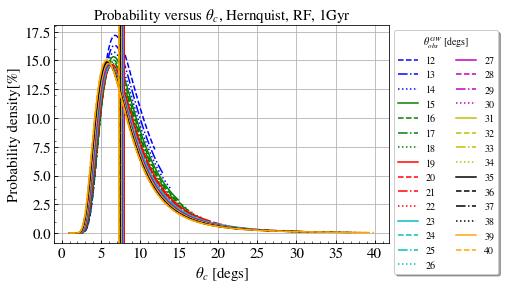

theta_c = 7.6 - 2.0 + 2.5 @ theta_obsGW = 12
theta_c = 7.7 - 2.2 + 2.9 @ theta_obsGW = 13
theta_c = 7.8 - 2.2 + 3.2 @ theta_obsGW = 14
theta_c = 7.8 - 2.3 + 3.4 @ theta_obsGW = 15
theta_c = 7.9 - 2.3 + 3.7 @ theta_obsGW = 16
theta_c = 7.9 - 2.4 + 3.9 @ theta_obsGW = 17
theta_c = 7.9 - 2.4 + 4.0 @ theta_obsGW = 18
theta_c = 7.8 - 2.4 + 4.2 @ theta_obsGW = 19
theta_c = 7.8 - 2.4 + 4.3 @ theta_obsGW = 20
theta_c = 7.8 - 2.4 + 4.4 @ theta_obsGW = 21
theta_c = 7.8 - 2.4 + 4.4 @ theta_obsGW = 22
theta_c = 7.8 - 2.4 + 4.5 @ theta_obsGW = 23
theta_c = 7.7 - 2.4 + 4.5 @ theta_obsGW = 24
theta_c = 7.7 - 2.4 + 4.6 @ theta_obsGW = 25
theta_c = 7.7 - 2.4 + 4.6 @ theta_obsGW = 26
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 27
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 28
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 29
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 30
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 31
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 32
theta_c = 7.4 - 2.4 + 4.6 @ theta_obsGW = 33
theta_c = 

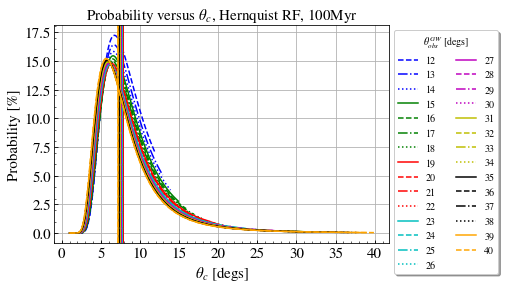

theta_c = 7.6 - 2.0 + 2.5 @ theta_obsGW = 12
theta_c = 7.7 - 2.1 + 2.9 @ theta_obsGW = 13
theta_c = 7.8 - 2.2 + 3.2 @ theta_obsGW = 14
theta_c = 7.8 - 2.3 + 3.4 @ theta_obsGW = 15
theta_c = 7.8 - 2.3 + 3.7 @ theta_obsGW = 16
theta_c = 7.8 - 2.4 + 3.9 @ theta_obsGW = 17
theta_c = 7.8 - 2.4 + 4.0 @ theta_obsGW = 18
theta_c = 7.8 - 2.4 + 4.2 @ theta_obsGW = 19
theta_c = 7.8 - 2.4 + 4.3 @ theta_obsGW = 20
theta_c = 7.8 - 2.4 + 4.4 @ theta_obsGW = 21
theta_c = 7.8 - 2.4 + 4.4 @ theta_obsGW = 22
theta_c = 7.7 - 2.4 + 4.5 @ theta_obsGW = 23
theta_c = 7.7 - 2.4 + 4.5 @ theta_obsGW = 24
theta_c = 7.7 - 2.4 + 4.5 @ theta_obsGW = 25
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 26
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 27
theta_c = 7.6 - 2.4 + 4.6 @ theta_obsGW = 28
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 29
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 30
theta_c = 7.5 - 2.4 + 4.6 @ theta_obsGW = 31
theta_c = 7.4 - 2.4 + 4.6 @ theta_obsGW = 32
theta_c = 7.4 - 2.4 + 4.6 @ theta_obsGW = 33
theta_c = 

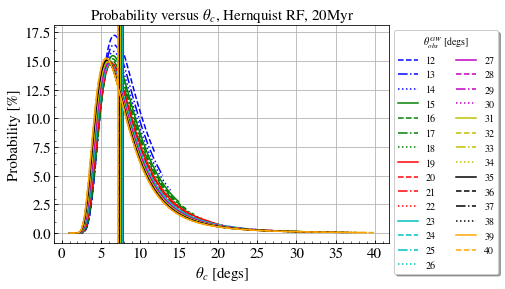

s = 20.0 - 8.2 + 34.2 @ theta_obsGW = 12
s = 17.4 - 6.8 + 27.1 @ theta_obsGW = 13
s = 15.5 - 5.7 + 22.1 @ theta_obsGW = 14
s = 14.0 - 4.9 + 18.1 @ theta_obsGW = 15
s = 12.8 - 4.3 + 15.2 @ theta_obsGW = 16
s = 11.8 - 3.8 + 12.9 @ theta_obsGW = 17
s = 11.0 - 3.4 + 11.1 @ theta_obsGW = 18
s = 10.3 - 3.0 + 9.7 @ theta_obsGW = 19
s = 9.7 - 2.8 + 8.5 @ theta_obsGW = 20
s = 9.2 - 2.5 + 7.6 @ theta_obsGW = 21
s = 8.7 - 2.3 + 6.8 @ theta_obsGW = 22
s = 8.3 - 2.2 + 6.1 @ theta_obsGW = 23
s = 8.0 - 2.0 + 5.6 @ theta_obsGW = 24
s = 7.7 - 1.9 + 5.1 @ theta_obsGW = 25
s = 7.4 - 1.8 + 4.7 @ theta_obsGW = 26
s = 7.2 - 1.7 + 4.3 @ theta_obsGW = 27
s = 6.9 - 1.6 + 4.0 @ theta_obsGW = 28
s = 6.7 - 1.5 + 3.7 @ theta_obsGW = 29
s = 6.5 - 1.4 + 3.5 @ theta_obsGW = 30
s = 6.4 - 1.4 + 3.3 @ theta_obsGW = 31
s = 6.2 - 1.3 + 3.1 @ theta_obsGW = 32
s = 6.1 - 1.3 + 2.9 @ theta_obsGW = 33
s = 5.9 - 1.2 + 2.8 @ theta_obsGW = 34
s = 5.8 - 1.2 + 2.6 @ theta_obsGW = 35
s = 5.7 - 1.1 + 2.5 @ theta_obsGW = 36
s = 5.6 - 

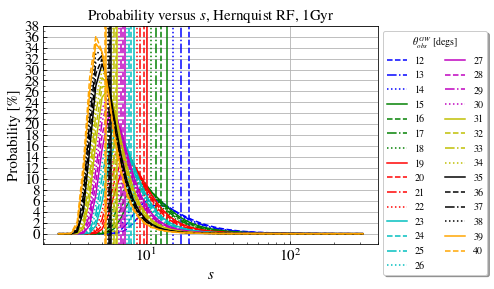

s = 19.6 - 8.0 + 33.2 @ theta_obsGW = 12
s = 17.2 - 6.6 + 26.3 @ theta_obsGW = 13
s = 15.3 - 5.6 + 21.5 @ theta_obsGW = 14
s = 13.8 - 4.8 + 17.6 @ theta_obsGW = 15
s = 12.6 - 4.2 + 14.8 @ theta_obsGW = 16
s = 11.6 - 3.7 + 12.6 @ theta_obsGW = 17
s = 10.8 - 3.3 + 10.8 @ theta_obsGW = 18
s = 10.2 - 3.0 + 9.4 @ theta_obsGW = 19
s = 9.6 - 2.7 + 8.3 @ theta_obsGW = 20
s = 9.1 - 2.5 + 7.4 @ theta_obsGW = 21
s = 8.6 - 2.3 + 6.6 @ theta_obsGW = 22
s = 8.3 - 2.1 + 6.0 @ theta_obsGW = 23
s = 7.9 - 2.0 + 5.4 @ theta_obsGW = 24
s = 7.6 - 1.9 + 5.0 @ theta_obsGW = 25
s = 7.3 - 1.7 + 4.6 @ theta_obsGW = 26
s = 7.1 - 1.6 + 4.2 @ theta_obsGW = 27
s = 6.9 - 1.6 + 3.9 @ theta_obsGW = 28
s = 6.7 - 1.5 + 3.7 @ theta_obsGW = 29
s = 6.5 - 1.4 + 3.4 @ theta_obsGW = 30
s = 6.3 - 1.4 + 3.2 @ theta_obsGW = 31
s = 6.2 - 1.3 + 3.0 @ theta_obsGW = 32
s = 6.0 - 1.2 + 2.9 @ theta_obsGW = 33
s = 5.9 - 1.2 + 2.7 @ theta_obsGW = 34
s = 5.8 - 1.2 + 2.6 @ theta_obsGW = 35
s = 5.6 - 1.1 + 2.5 @ theta_obsGW = 36
s = 5.5 - 

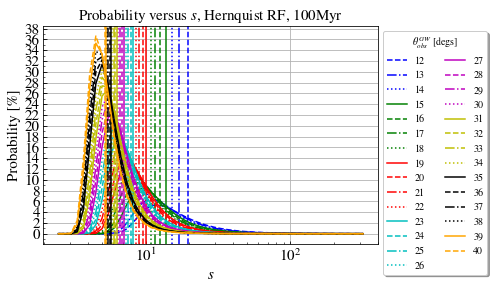

s = 19.5 - 8.0 + 33.1 @ theta_obsGW = 12
s = 17.1 - 6.6 + 26.2 @ theta_obsGW = 13
s = 15.2 - 5.6 + 21.4 @ theta_obsGW = 14
s = 13.8 - 4.8 + 17.5 @ theta_obsGW = 15
s = 12.6 - 4.2 + 14.7 @ theta_obsGW = 16
s = 11.6 - 3.7 + 12.5 @ theta_obsGW = 17
s = 10.8 - 3.3 + 10.8 @ theta_obsGW = 18
s = 10.1 - 3.0 + 9.4 @ theta_obsGW = 19
s = 9.6 - 2.7 + 8.3 @ theta_obsGW = 20
s = 9.1 - 2.5 + 7.3 @ theta_obsGW = 21
s = 8.6 - 2.3 + 6.6 @ theta_obsGW = 22
s = 8.2 - 2.1 + 5.9 @ theta_obsGW = 23
s = 7.9 - 2.0 + 5.4 @ theta_obsGW = 24
s = 7.6 - 1.9 + 4.9 @ theta_obsGW = 25
s = 7.3 - 1.7 + 4.5 @ theta_obsGW = 26
s = 7.1 - 1.6 + 4.2 @ theta_obsGW = 27
s = 6.9 - 1.6 + 3.9 @ theta_obsGW = 28
s = 6.7 - 1.5 + 3.6 @ theta_obsGW = 29
s = 6.5 - 1.4 + 3.4 @ theta_obsGW = 30
s = 6.3 - 1.4 + 3.2 @ theta_obsGW = 31
s = 6.2 - 1.3 + 3.0 @ theta_obsGW = 32
s = 6.0 - 1.2 + 2.9 @ theta_obsGW = 33
s = 5.9 - 1.2 + 2.7 @ theta_obsGW = 34
s = 5.8 - 1.2 + 2.6 @ theta_obsGW = 35
s = 5.6 - 1.1 + 2.5 @ theta_obsGW = 36
s = 5.5 - 

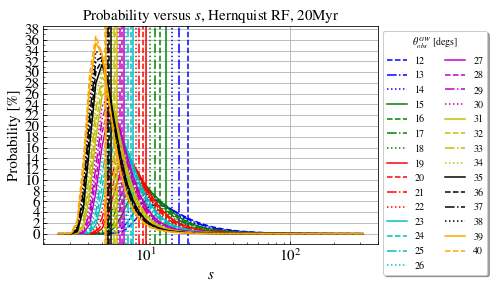

In [21]:
print('Hey user hit 2!')
df = pickRF(data_matrix)   

# for theta_c
        
for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist, RF, 1Gyr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability density[%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHquist1GyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '100Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist RF, 100Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist100MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '20Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hernquist RF, 20Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist20MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


# for s

for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 1Gyr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist1GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '100Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 100Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist100GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '20Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hernquist RF, 20Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHernquist20GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()




### constraint plot for Hopkins RF

Hey user hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76
theta_c = 7.9 - 2.1 + 2.4 @ theta_obsGW = 12
theta_c = 8.1 - 2.2 + 2.8 @ theta_obsGW = 13
theta_c = 8.2 - 2.3 + 3.1 @ theta_obsGW = 14
theta_c = 8.3 - 2.4 + 3.4 @ theta_obsGW = 15
theta_c = 8.3 - 2.4 + 3.7 @ theta_obsGW = 16
theta_c = 8.3 - 2.5 + 3.9 @ theta_obsGW = 17
theta_c = 8.3 - 2.5 + 4.1 @ theta_obsGW = 18
theta_c = 8.3 - 2.5 + 4.3 @ theta_obsGW = 19
theta_c = 8.3 - 2.5 + 4.4 @ theta_obsGW = 20
theta_c = 8.3 - 2.6 + 4.5 @ theta_obsGW = 21
theta_c = 8.3 - 2.6 + 4.6 @ theta_obsGW = 22
theta_c = 8.3 - 2.6 + 4.7 @ theta_obsGW = 23
theta_c = 8.2 - 2.6 + 4.7 @ theta_obsGW = 24
theta_c = 8.2 - 2.6 + 4.8 @ theta_obsGW = 25
theta_c = 8.2 - 2.6 + 4.8 @ theta_obsGW = 26
theta_c = 8.2 - 2.6 + 4.8 @ theta_obsGW = 27
theta_c = 8.1 - 2.6 + 4.9 @ theta_obsGW = 28
theta_c = 8.1 - 2.6 + 4.9 @ theta_obsGW = 29
theta_c = 8.1 - 2.6 + 4.9 @ theta_obsGW = 30
theta_c = 8.0 - 2.6 + 4.9 @ theta_obsGW = 31
theta_c =

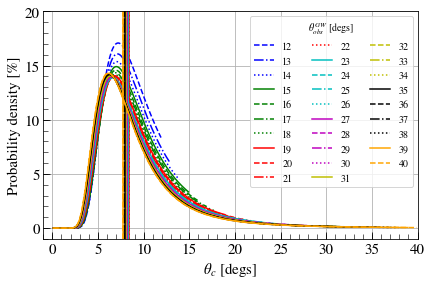

theta_c = 7.4 - 2.0 + 2.6 @ theta_obsGW = 12
theta_c = 7.5 - 2.1 + 2.9 @ theta_obsGW = 13
theta_c = 7.5 - 2.2 + 3.2 @ theta_obsGW = 14
theta_c = 7.6 - 2.2 + 3.4 @ theta_obsGW = 15
theta_c = 7.6 - 2.3 + 3.6 @ theta_obsGW = 16
theta_c = 7.6 - 2.3 + 3.8 @ theta_obsGW = 17
theta_c = 7.6 - 2.3 + 4.0 @ theta_obsGW = 18
theta_c = 7.6 - 2.3 + 4.1 @ theta_obsGW = 19
theta_c = 7.5 - 2.3 + 4.2 @ theta_obsGW = 20
theta_c = 7.5 - 2.3 + 4.2 @ theta_obsGW = 21
theta_c = 7.5 - 2.3 + 4.3 @ theta_obsGW = 22
theta_c = 7.5 - 2.3 + 4.3 @ theta_obsGW = 23
theta_c = 7.4 - 2.3 + 4.4 @ theta_obsGW = 24
theta_c = 7.4 - 2.3 + 4.4 @ theta_obsGW = 25
theta_c = 7.4 - 2.3 + 4.4 @ theta_obsGW = 26
theta_c = 7.3 - 2.3 + 4.4 @ theta_obsGW = 27
theta_c = 7.3 - 2.3 + 4.4 @ theta_obsGW = 28
theta_c = 7.3 - 2.3 + 4.4 @ theta_obsGW = 29
theta_c = 7.3 - 2.3 + 4.4 @ theta_obsGW = 30
theta_c = 7.2 - 2.3 + 4.4 @ theta_obsGW = 31
theta_c = 7.2 - 2.3 + 4.4 @ theta_obsGW = 32
theta_c = 7.2 - 2.3 + 4.4 @ theta_obsGW = 33
theta_c = 

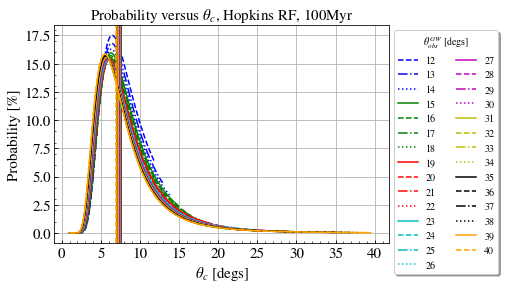

theta_c = 7.1 - 2.0 + 2.7 @ theta_obsGW = 12
theta_c = 7.2 - 2.1 + 2.9 @ theta_obsGW = 13
theta_c = 7.2 - 2.1 + 3.2 @ theta_obsGW = 14
theta_c = 7.2 - 2.1 + 3.4 @ theta_obsGW = 15
theta_c = 7.3 - 2.2 + 3.6 @ theta_obsGW = 16
theta_c = 7.3 - 2.2 + 3.7 @ theta_obsGW = 17
theta_c = 7.2 - 2.2 + 3.9 @ theta_obsGW = 18
theta_c = 7.2 - 2.2 + 4.0 @ theta_obsGW = 19
theta_c = 7.2 - 2.2 + 4.0 @ theta_obsGW = 20
theta_c = 7.2 - 2.2 + 4.1 @ theta_obsGW = 21
theta_c = 7.1 - 2.2 + 4.1 @ theta_obsGW = 22
theta_c = 7.1 - 2.2 + 4.2 @ theta_obsGW = 23
theta_c = 7.1 - 2.2 + 4.2 @ theta_obsGW = 24
theta_c = 7.1 - 2.2 + 4.2 @ theta_obsGW = 25
theta_c = 7.0 - 2.2 + 4.2 @ theta_obsGW = 26
theta_c = 7.0 - 2.2 + 4.2 @ theta_obsGW = 27
theta_c = 7.0 - 2.2 + 4.2 @ theta_obsGW = 28
theta_c = 6.9 - 2.2 + 4.2 @ theta_obsGW = 29
theta_c = 6.9 - 2.2 + 4.2 @ theta_obsGW = 30
theta_c = 6.9 - 2.2 + 4.2 @ theta_obsGW = 31
theta_c = 6.9 - 2.2 + 4.2 @ theta_obsGW = 32
theta_c = 6.8 - 2.2 + 4.2 @ theta_obsGW = 33
theta_c = 

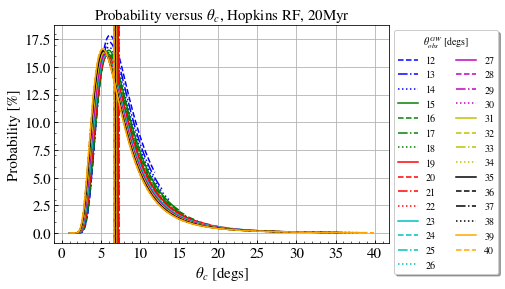

s = 21.7 - 9.2 + 39.1 @ theta_obsGW = 12
s = 18.9 - 7.5 + 30.9 @ theta_obsGW = 13
s = 16.7 - 6.4 + 25.2 @ theta_obsGW = 14
s = 15.0 - 5.4 + 20.7 @ theta_obsGW = 15
s = 13.7 - 4.7 + 17.3 @ theta_obsGW = 16
s = 12.6 - 4.2 + 14.7 @ theta_obsGW = 17
s = 11.7 - 3.7 + 12.6 @ theta_obsGW = 18
s = 10.9 - 3.3 + 11.0 @ theta_obsGW = 19
s = 10.3 - 3.0 + 9.6 @ theta_obsGW = 20
s = 9.7 - 2.8 + 8.5 @ theta_obsGW = 21
s = 9.2 - 2.5 + 7.6 @ theta_obsGW = 22
s = 8.8 - 2.3 + 6.8 @ theta_obsGW = 23
s = 8.4 - 2.2 + 6.2 @ theta_obsGW = 24
s = 8.1 - 2.0 + 5.7 @ theta_obsGW = 25
s = 7.8 - 1.9 + 5.2 @ theta_obsGW = 26
s = 7.5 - 1.8 + 4.8 @ theta_obsGW = 27
s = 7.3 - 1.7 + 4.4 @ theta_obsGW = 28
s = 7.0 - 1.6 + 4.1 @ theta_obsGW = 29
s = 6.8 - 1.5 + 3.8 @ theta_obsGW = 30
s = 6.6 - 1.5 + 3.6 @ theta_obsGW = 31
s = 6.5 - 1.4 + 3.4 @ theta_obsGW = 32
s = 6.3 - 1.3 + 3.2 @ theta_obsGW = 33
s = 6.2 - 1.3 + 3.0 @ theta_obsGW = 34
s = 6.0 - 1.2 + 2.9 @ theta_obsGW = 35
s = 5.9 - 1.2 + 2.7 @ theta_obsGW = 36
s = 5.8 

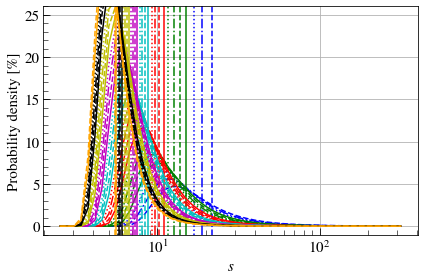

s = 18.4 - 7.3 + 29.7 @ theta_obsGW = 12
s = 16.1 - 6.0 + 23.4 @ theta_obsGW = 13
s = 14.4 - 5.1 + 19.1 @ theta_obsGW = 14
s = 13.1 - 4.4 + 15.7 @ theta_obsGW = 15
s = 12.0 - 3.9 + 13.2 @ theta_obsGW = 16
s = 11.1 - 3.4 + 11.3 @ theta_obsGW = 17
s = 10.4 - 3.1 + 9.8 @ theta_obsGW = 18
s = 9.7 - 2.8 + 8.5 @ theta_obsGW = 19
s = 9.2 - 2.5 + 7.5 @ theta_obsGW = 20
s = 8.7 - 2.3 + 6.7 @ theta_obsGW = 21
s = 8.3 - 2.1 + 6.0 @ theta_obsGW = 22
s = 8.0 - 2.0 + 5.4 @ theta_obsGW = 23
s = 7.7 - 1.9 + 5.0 @ theta_obsGW = 24
s = 7.4 - 1.7 + 4.5 @ theta_obsGW = 25
s = 7.1 - 1.6 + 4.2 @ theta_obsGW = 26
s = 6.9 - 1.6 + 3.9 @ theta_obsGW = 27
s = 6.7 - 1.5 + 3.6 @ theta_obsGW = 28
s = 6.5 - 1.4 + 3.4 @ theta_obsGW = 29
s = 6.3 - 1.3 + 3.2 @ theta_obsGW = 30
s = 6.2 - 1.3 + 3.0 @ theta_obsGW = 31
s = 6.0 - 1.2 + 2.8 @ theta_obsGW = 32
s = 5.9 - 1.2 + 2.7 @ theta_obsGW = 33
s = 5.7 - 1.1 + 2.5 @ theta_obsGW = 34
s = 5.6 - 1.1 + 2.4 @ theta_obsGW = 35
s = 5.5 - 1.1 + 2.3 @ theta_obsGW = 36
s = 5.4 - 1.

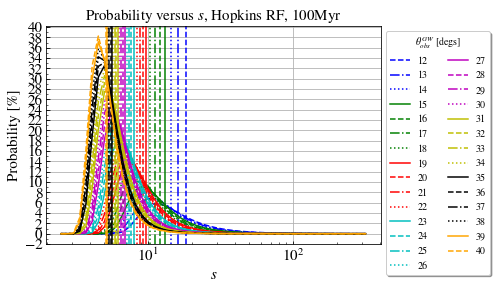

s = 17.1 - 6.6 + 26.2 @ theta_obsGW = 12
s = 15.1 - 5.5 + 20.7 @ theta_obsGW = 13
s = 13.6 - 4.7 + 16.9 @ theta_obsGW = 14
s = 12.3 - 4.0 + 13.9 @ theta_obsGW = 15
s = 11.4 - 3.5 + 11.8 @ theta_obsGW = 16
s = 10.5 - 3.1 + 10.1 @ theta_obsGW = 17
s = 9.9 - 2.8 + 8.7 @ theta_obsGW = 18
s = 9.3 - 2.6 + 7.6 @ theta_obsGW = 19
s = 8.8 - 2.3 + 6.8 @ theta_obsGW = 20
s = 8.4 - 2.2 + 6.0 @ theta_obsGW = 21
s = 8.0 - 2.0 + 5.4 @ theta_obsGW = 22
s = 7.7 - 1.9 + 4.9 @ theta_obsGW = 23
s = 7.4 - 1.7 + 4.5 @ theta_obsGW = 24
s = 7.1 - 1.6 + 4.2 @ theta_obsGW = 25
s = 6.9 - 1.5 + 3.8 @ theta_obsGW = 26
s = 6.7 - 1.5 + 3.6 @ theta_obsGW = 27
s = 6.5 - 1.4 + 3.3 @ theta_obsGW = 28
s = 6.3 - 1.3 + 3.1 @ theta_obsGW = 29
s = 6.1 - 1.3 + 2.9 @ theta_obsGW = 30
s = 6.0 - 1.2 + 2.8 @ theta_obsGW = 31
s = 5.8 - 1.2 + 2.6 @ theta_obsGW = 32
s = 5.7 - 1.1 + 2.5 @ theta_obsGW = 33
s = 5.6 - 1.1 + 2.4 @ theta_obsGW = 34
s = 5.5 - 1.0 + 2.3 @ theta_obsGW = 35
s = 5.4 - 1.0 + 2.2 @ theta_obsGW = 36
s = 5.3 - 1.0

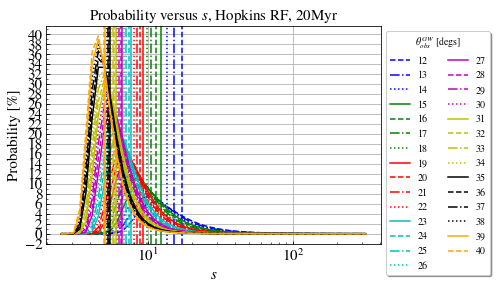

In [14]:
print('Hey user hit 6!')
df = pickRF(data_matrix)   

# for theta_c
        
for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    # the list of theta_c
    theta_c = np.arange(1., i, 0.1)
    # the list of probability density 
    P = 100.*P_theta_c(theta_c)
    # I know theta_c < 1. P(theta_c) ~ e-30. Because of numerical error 
    # I add theta_c  =[0, 1] deg
    theta_c = np.append(np.arange(0.1, 1, 0.1), theta_c)
    # I add the corresponding P(theta_c)
    P = np.append([0.]*len(np.arange(0.1, 1, 0.1)), P)
    # plot 
    plt.plot(theta_c, P, color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
#ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.legend(ncol=3, title=r'$\theta_{obs}^{GW}$ [degs]')
#plt.title(r'Probability versus $\theta_c$, Hopkins RF, 1Gyr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability density [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(5))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins1GyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.tight_layout()
plt.xlim(-1, 40)
plt.ylim(-1, 20)
plt.savefig('ProBrokenHopkins1GyrTheta_c.pdf')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '100Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hopkins RF, 100Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins100MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '20Myr', theta_obsGW=i)
    theta_c = np.arange(1., i, 0.1)
    plt.plot(theta_c, 100.*P_theta_c(theta_c), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_theta_c, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.title(r'Probability versus $\theta_c$, Hopkins RF, 20Myr', fontsize=15)
plt.grid()
plt.xlabel(r'$\theta_c$ [degs]', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins20MyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


# for s

for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=i)
    # the list of s
    s = np.logspace(0.4, 2.5, 50)
    # the list of P(s)
    P = 100.*P_s(s)
    # plot 
    plt.plot(s, P, color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
#ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
#plt.legend(ncol=3, title=r'$\theta_{obs}^{GW}$ [degs]')
plt.grid()
plt.xscale('log')
#plt.title(r'Probability versus $s$, Hopkins RF, 1Gyr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability density [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(5))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins1GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.ylim(-1, 26)
plt.tight_layout()
plt.savefig('ProBrokenHopkins1GyrS.pdf')
plt.show()

for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '100Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hopkins RF, 100Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins100GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()


for color_ind, i in enumerate(np.arange(12, 41, 1),1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '20Myr', theta_obsGW=i)
    s = np.logspace(0.4, 2.5, 50)
    plt.plot(s, 100.*P_s(s), color=set[color_ind][0], linestyle=set[color_ind][1],label=label)
    plt.axvline(med_s, color=set[color_ind][0], linestyle=set[color_ind][1])
    print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
plt.grid()
plt.xscale('log')
plt.title(r'Probability versus $s$, Hopkins RF, 20Myr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel('Probability [%]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(2))
plt.axes().yaxis.set_minor_locator(MultipleLocator(1))
plt.axes().yaxis.set_tick_params(which='minor', right = False)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins20GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()





In [10]:
df[(df['label_RF']=='6') & (df['label_tmin']=='1') & (df['theta_c']==10.) & ((df['theta_obsGW']==36))]['LRDmean']

2701    2449.840335
Name: LRDmean, dtype: float64

In [34]:
factor_NSNS = r_nsns
factor_NSBH = (1-r_nsns)
ratio_NSNS = factor_NSNS/(factor_NSNS+factor_NSBH)
ratio_NSBH = factor_NSBH/(factor_NSNS+factor_NSBH)
(ratio_NSNS*8.9*10**(-4)+ratio_NSBH*3.59*10**(-3))* 2499


3.34866

## LRD


### LRD 
##### Find the LRDs. Hernquist 1Gyr has a peak at theta_c = 9 degs. Hernquist 100Myr has a peak at theta_c = 10 degs.
##### At this stage, the uncertainty of LF has already been averaged out. 
##### the contribution of theta_obsGW is sub-dominant. (less than 5%)
##### I choose theta_obsGW = 30 degs
##### So uncertainty of LRD is due to the uncertainty of LF 
##### at a fixed RF, at a fixed t_min
##### The Hernquist RF gives 1.4 times greater LRD than the Hopkins does
##### theta_c = 9 degs gives 2.6 times, theta_c = 22 degs gives 0.5 times as much LRD as that of theta_c = 9 degs 

In [12]:
# the peak of theta_c 
peak_theta_c = 10
theta_obsGW = 30
# pick up Hernquist RF, Hey user, please hit 2! since Hernquist RF's label is 2 
print('Hey user, please hit 2!')
# Hernquist RF
dfHer = pickRF(data_matrix)
# Hernquist, 1Gyr, the mean value 
Her1Gyrmean = dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her1Gyrlow = (Her1Gyrmean-dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her1Gyrup = (Her1Gyrmean+dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hernquist, 100Myr, the mean value
Her100Myrmean = dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her100Myrlow = (Her100Myrmean-dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her100Myrup = (Her100Myrmean+dfHer[(dfHer['label_tmin']=='2')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hernquist, 20Myr, the mean value
Her20Myrmean = dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Her20Myrlow = (Her20Myrmean-dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Her20Myrup = (Her20Myrmean+dfHer[(dfHer['label_tmin']=='3')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDstd']).max()


# pick up Hopkins RF, Hey user, please hit 6!
print('pick up Hopkins RF, Hey user, please hit 6!')
dfHop = pickRF(data_matrix)
# Hopkins, 1Gyr, the mean value 
Hop1Gyrmean = dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) & (dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop1Gyrlow = (Hop1Gyrmean-dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop1Gyrup = (Hop1Gyrmean+dfHop[(dfHop['label_tmin']=='1')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# Hopkins, 100Myr, the mean value
Hop100Myrmean = dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop100Myrlow = (Hop100Myrmean-dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop100Myrup = (Hop100Myrmean+dfHop[(dfHop['label_tmin']=='2')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()


# Hopkins, 20Myr, the mean value
Hop20Myrmean = dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean()
# the lower limit 
Hop20Myrlow = (Hop20Myrmean-dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).min()
# the upper limit 
Hop20Myrup = (Hop20Myrmean+dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) &(dfHop['theta_obsGW']==theta_obsGW)]['LRDstd']).max()

# the list of the mean vlaues
HerHopmean = [Her1Gyrmean, Her100Myrmean, Her20Myrmean, Hop1Gyrmean, Hop100Myrmean, Hop20Myrmean]
# the list of the lowest vlaues 
HerHoplow = [Her1Gyrlow, Her100Myrlow, Her20Myrlow, Hop1Gyrlow, Hop100Myrlow, Hop20Myrlow]
# the listof the highest values 
HerHopup = [Her1Gyrup, Her100Myrup, Her20Myrup, Hop1Gyrup, Hop100Myrup, Hop20Myrup]
# the lower error 
HerHoplowerr = np.array(HerHopmean)-np.array(HerHoplow)
# the upper error
HerHopuperr = np.array(HerHoplow) + np.array(HerHopmean)


Hey user, please hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72
pick up Hopkins RF, Hey user, please hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76


In [14]:
print(dfHer[(dfHer['label_tmin']=='1')  & (dfHer['theta_c']==peak_theta_c) & (dfHer['theta_obsGW']==theta_obsGW)]['LRDmean'].mean())
print(dfHop[(dfHop['label_tmin']=='3')  & (dfHop['theta_c']==peak_theta_c) & (dfHop['theta_obsGW']==theta_obsGW)]['LRDmean'].mean())



3477.2619489309923
1942.2783556928869


## plot LRD

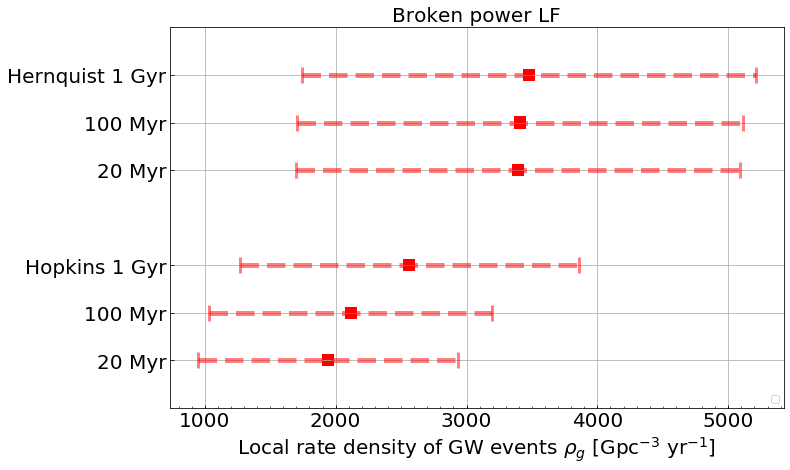

In [13]:
# plot!

def plot_GW(ave_v,err_v):
    plt.figure(figsize=(11, 7))
    ############################################
    y = [5., 4.5, 4., 3., 2.5, 2.]
    eb1=plt.errorbar(ave_v,y,xerr=err_v,fmt='none',ecolor='red', linewidth=3, edgecolor='red', capsize=8, capthick=3. ,elinewidth=5, alpha=0.5, capstyle=':')
    eb1[-1][0].set_linestyle('--')
    plt.scatter(ave_v, y,marker='s', s=150, color='r', edgecolor='none' , alpha=1)
    plt.legend(loc='lower right')
    #plt.xlabel('Power law index $s$')
    plt.xlabel(r'Local rate density of GW events $\rho_{g}$ [Gpc$^{-3}$ yr$^{-1}}$]', size=20.)
    plt.yticks(y,['Hernquist 1 Gyr', '100 Myr','20 Myr','Hopkins 1 Gyr', '100 Myr', '20 Myr'], size=20)
    plt.xticks(fontsize=20)
    #plt.ylabel(u"star formation rate with differnet minimum delay times")
    #plt.title(r'Power law index, $\theta_{obs}^{GW}=28^{\circ}$, $\theta_{c}^{GW}=10^{\circ}$, size=20')
    #plt.title(r'Broken power LF, $\theta_{c}$=%i$^{\circ}$' % peak_theta_c, size=20)
    plt.title('Broken power LF', size=20)
    plt.ylim(1.5, 5.5)
    plt.grid()
    plt.axes().xaxis.set_minor_locator(MultipleLocator(100))
    plt.axes().xaxis.set_tick_params(which='minor', right = False)
    plt.tick_params(which='both', direction='in')
    plt.show()
    return None 

#print(HerHopmean)
plot_GW(HerHopmean, [HerHoplowerr,HerHoplowerr])




# Plot theta_c as a parameter space of s, color is the probablity

In [8]:
# The case of Hopkins
print('Hey user hit 6!')
df = pickRF(data_matrix) 

Hey user hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76


In [9]:
def find_s(theta_c, theta_obsGW, log10LisoGW=log10LisoGW, log10typiL_iso=log10typiL_iso):
    '''
    this gives s with given theta_c and theta_obsGW
    Usege: s = find_s(theta_c = 15, theta_obsGW = 36)
    '''
    out = -(log10LisoGW  - log10typiL_iso)/np.log10(float(theta_obsGW)/float(theta_c))
    return out 

In [10]:
import matplotlib.collections as mcoll
from matplotlib.colors import ListedColormap


def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """

    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    # this needs to be uncommented to make a colorbar but it will be prevented from being shown 
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,linewidth=linewidth, alpha=alpha)
    
    # K.M modified the code such that the color is chosen manually consistent thoughtout each curve 
    for i, j in zip(segments, z):
        plt.plot(i[:,0], i[:,1], color=cm.viridis(j))
    # K.M commented the two line below not to show the plot made by mcoll.LineCollection    
    #ax = plt.gca()
    #ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments




### verifiy $P(\theta_c)d\theta_c = P(s)\left|\frac{d\theta_c}{ds}\right|ds$

In [11]:
# find the distribution of theta_c  and s if theta_obsGW = 29
P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=29)
P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=29)

# define the integral of P(theta_c)
def int_P_theta_c(xstart, xend):
    out, err = integrate.quad(lambda x: P_theta_c(x), xstart, xend)
    return out

# define the integral of P(s)
def int_P_s(xstart, xend):
    out, err = integrate.quad(lambda x: P_s(x), xstart, xend)
    return out

# the list of theta_c
theta_c_list = np.arange(1., 12., 0.1)
# probablity of given delta theta_c
ha = np.vectorize(int_P_theta_c)(xstart=theta_c_list[:-1],xend=theta_c_list[1:])
# convert the list of theta_c to the corresponding s 
s_list = np.vectorize(find_s)(theta_c = theta_c_list, theta_obsGW = 29)
# probablity of given delta s
ka = np.vectorize(int_P_s)(s_list[:-1], s_list[1:])
for i,j in zip(ha, ka):
    print(i,j)

print('='*50)
print('Yes, each probablity is the same as supposed to be')
print('='*50)

(1.3356613295591506e-33, 1.3355407487328936e-33)
(3.036934399784343e-29, 3.036682632508956e-29)
(1.1095429431691318e-25, 1.1094595819500933e-25)
(9.775715856933485e-23, 9.775053557954947e-23)
(2.813259555686235e-20, 2.813087876917044e-20)
(3.3224912469331205e-18, 3.3223084745822754e-18)
(1.9153973243084416e-16, 1.9153021800017567e-16)
(6.159656222768638e-15, 6.159379348949049e-15)
(1.226063671967229e-13, 1.2260136863932792e-13)
(1.639618123627948e-12, 1.6395573504704867e-12)
(1.572713533777099e-11, 1.572660410487685e-11)
(1.1405459032742874e-10, 1.140510712858727e-10)
(6.527127515132221e-10, 6.526943144641999e-10)
(3.0528118060183226e-09, 3.0527326883163056e-09)
(1.2011547847752412e-08, 1.201126163753852e-08)
(4.0722670156594635e-08, 4.072177622825098e-08)
(1.213693285849384e-07, 1.2136686945010275e-07)
(3.2338417773506275e-07, 3.2337811896277654e-07)
(7.81318898037629e-07, 7.813053389078934e-07)
(1.7324672286276786e-06, 1.7324393345498225e-06)
(3.5619197763378606e-06, 3.56186648672828

### Now I do not worry about the probablity of s because I plot the curve with the color is the probablity finding $\theta_c$ to $\theta_c+\Delta\theta_c$. 

### function CDF giving the edge with a certain confidence level

In [12]:
# for the median the lower and upper limit
def integral_P_normalized(P_normalized, lowerx, upperx):
    '''
    integral of P_normalized from lowerx to upperx
    lowerx and upperx are expected as theta_c
    '''
    result, err = integrate.quad(lambda x: P_normalized(x), lowerx, upperx)
    return result
    
# a function finding the median, lower and upper bounds of theta_c
def confidential_theta_c(P_normalized, theta_obsGW, integral_from_left):
    '''
    for the median: integral_from_left = 0.5
    for the lower bound: integral_from_left = 0.16
    for the upper bound: integral_from_left = 0.84
    where integral_P_normalized is expected to be PDF of theta_c
    '''
    median_inv = pynverse.inversefunc(lambda t: integral_P_normalized(P_normalized, lowerx=0.5, upperx=t), domain=[0.5, theta_obsGW])
    output = median_inv(integral_from_left)
    return output

## Plot

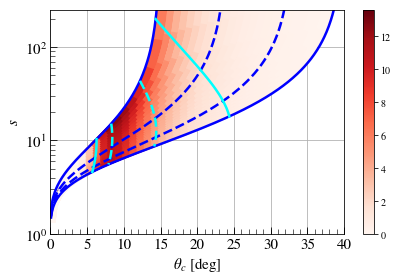

In [40]:
# make a empty list for storing the first value of theta_obsGW to make the colorbar I want
# because the theta_obsGW gives highestt probability so that it has to be shown 
lc_list = []
P_theta_c_list = []
colors = []
theta_obsGW_list = np.arange(15, 41, 1)
for i in theta_obsGW_list: # loop with theta_obsGW
#for i in np.arange(15, 17, 1):
    theta_c_list = np.arange(1., i, 1.) # loop with theta_c
    # find the probablity density of theta_c, its median, 1sigma edges 
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    # fill P(theta_c) into the list 
    P_theta_c_list.append(P_theta_c)
    # integral of the probablity density of theta_c
    def int_P_theta_c(xstart, xend):
        '''
        input is left side of theta_c, and the right side of theta_c
        USAGE: color = int_P_theta_c(xstart=theta_c_left, xend=theta_c_right)
        '''
        out, err = integrate.quad(lambda x: P_theta_c(x), xstart, xend)
        return out
    # caluculate the probablity finding theta_c in the interval theta_c -> theta_c+delta theta_c
    # the values are used for the color 
    color = np.vectorize(int_P_theta_c)(xstart=theta_c_list[:-1], xend=theta_c_list[1:])
    # add theta_c = theta_obsGW - 0.01 to extend curve till the panel of the plot 
    theta_c_list = np.append(theta_c_list, [i-0.01])
    # calculate the probablity theta_c = [theta_obsGW-1, theta_obsGW], 
    # which is 1 - P(theta_c = [1, theta_obsGW-1])
    # create the correspoding color theta_c_list[0] = 1 deg, theta_c_list[-2] = theta_obsGW - 1 deg
    color_last = (1-np.vectorize(int_P_theta_c)(xstart=theta_c_list[0], xend=theta_c_list[-2]))
    # add colar last to the color list 
    color = np.append(color, color_last)
    # add theta_c = theta_obsGW - 0.01 to extend curve till the panel of the plot 
    theta_c_list = np.append(theta_c_list, [i-0.01])
    # I know theta_c < 1. P(theta_c) ~ e-30. Because of numerical error 
    # I add theta_c  =[0, 1] deg
    theta_c_list = np.append(np.arange(0.1, 1, 0.1), theta_c_list)
    # I add the color of theta_c = [0, 1] deg
    color = np.append([0.]*len(np.arange(0.1, 1, 0.1)), color)
    # add color vector to the list 
    colors.append(color)
    # convert the list of theta_c to the corresponding s 
    s_list = np.vectorize(find_s)(theta_c = theta_c_list, theta_obsGW = i)
    # curve for theta_obsGW confidence level with low-spin prior case 
    #lc = colorline(x=theta_clist, y=s_list, z=color, cmap='OrRd', linewidth=0.5, norm=None)
    # line color plot 
    #lc = colorline(x=theta_c_list, y=s_list, z=color, cmap='viridis', linewidth=1, norm=None)
    # make segments of the curve
    segments = make_segments(x=theta_c_list, y=s_list)
    # this needs to be uncommented to make a colorbar but it will be prevented from being shown 
    lc = mcoll.LineCollection(segments, array=100*color, cmap='Reds', norm=None)
    # store the object to the list defined on the top   
    lc_list.append(lc)
    # K.M modified the code such that the color is chosen manually consistent thoughtout each curve 
    color = (color-np.amin(colors[0]))/(np.amax(colors[0])-np.amin(colors[0]))
    for p, q in zip(segments, color):
        # chop the segment to make the width of the line SMOOTH
        # the sequece of chopped line of theta_c 
        # p[0,0] is the left and p[1,0] is the right points of theta_c
        chopped_theta_c = np.linspace(p[0,0], p[1,0], 10, endpoint=True)
        # the sequece of chopped line of s
        chopped_s = np.vectorize(find_s)(theta_c = chopped_theta_c, theta_obsGW = i)
        # make segments with chopped sequences
        chopped_segments = make_segments(x=chopped_theta_c, y=chopped_s)
        # plot for each chopped segment 
        # with color is in delta theta = 1 deg and the width is based on the sequece of the chopped segments
        # Note: p is in 1 deg 
        # Note: ele is in 0.1 deg
        if i != theta_obsGW_list[0] and i != theta_obsGW_list[-1]:
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Reds(q), linewidth=np.log(0.3*ele[1,1]*ele[1,0]))
        if i == theta_obsGW_list[1]:
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Reds(q), linewidth=np.log(0.8*ele[0,1]*ele[1,0]*ele[0,1]))
        if i == theta_obsGW_list[-2] or i == theta_obsGW_list[-3] :
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Reds(q), linewidth=np.log(0.0001*ele[0,1]**3*ele[1,0]))  

# # fill the area of theta_c = [0.1, 1] to be dark due to plot mulfunction 
# it is supposed to be dark the line plot above
theta_c_list_fill = np.linspace(0.1, 1.1, 10, endpoint=True)
s_fill_up = np.vectorize(find_s)(theta_c = theta_c_list_fill, theta_obsGW = 15)
s_fill_down = np.vectorize(find_s)(theta_c = theta_c_list_fill, theta_obsGW = 40)
plt.fill_between(theta_c_list_fill, s_fill_down, s_fill_up, facecolor=cm.viridis(0.), alpha=1.)

     
# 90% theta_obsGW = 15 deg
plt.plot(np.arange(0.1, 15-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 15-0.01, 0.1), theta_obsGW = 15), c='blue', ls='-', linewidth=2.5)
# 90% theta_obsGW = 40 deg
plt.plot(np.arange(0.1, 40-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 40-0.01, 0.1), theta_obsGW = 40), c='blue', ls='-', linewidth=2.5)
# 50% theta_obsGW = 24 deg
plt.plot(np.arange(0.1, 24-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 24-0.01, 0.1), theta_obsGW = 24), c='blue', ls='--', linewidth=2.5)  
# 50% theta_obsGW = 33 deg
plt.plot(np.arange(0.1, 33-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 33-0.01, 0.1), theta_obsGW = 33), c='blue', ls='--', linewidth=2.5)  




#plot the color bar when theta_obsGW = 15 deg
h = plt.colorbar(lc_list[0]) 
# write the label for the color bar
#h.set_label(r'Probablity in $\Delta\theta_c = 1.0^\circ$ [%]', fontsize=12)

# plot the confidence curve 
# with 90% and 50% confidenc level  
low_bd90_theta_c_lt =  np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.05)
high_bd90_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.95)
low_bd50_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.25)
high_bd50_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.75)
low_bd90_s_lt = np.vectorize(find_s)(low_bd90_theta_c_lt, theta_obsGW_list)
high_bd90_s_lt = np.vectorize(find_s)(high_bd90_theta_c_lt, theta_obsGW_list)
low_bd50_s_lt = np.vectorize(find_s)(low_bd50_theta_c_lt, theta_obsGW_list)
high_bd50_s_lt = np.vectorize(find_s)(high_bd50_theta_c_lt, theta_obsGW_list)

#plt.plot(med_theta_c_list, cor_med_s_list, c='black')
plt.plot(low_bd90_theta_c_lt, low_bd90_s_lt, c='cyan', ls='-', lw=2.5)
plt.plot(high_bd90_theta_c_lt, high_bd90_s_lt, c='cyan', ls='-', lw=2.5)
plt.plot(low_bd50_theta_c_lt, low_bd50_s_lt, c='cyan', ls='--', lw=2.5)
plt.plot(high_bd50_theta_c_lt, high_bd50_s_lt, c='cyan', ls='--', lw=2.5)

# #whiten outside 90% credible region 
# #90% theta_obsGW = 15 deg
# plt.fill_between(np.arange(0.1, 15-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 15-0.01, 0.1), theta_obsGW = 15), [10**5]*len(np.arange(0.1, 15-0.01, 0.1)))
# # 90% theta_obsGW = 40 deg
# plt.plot(np.arange(0.1, 40-0.01, 0.1), np.vectorize(find_s)(theta_c = np.arange(0.1, 40-0.01, 0.1), theta_obsGW = 40), c='orange', ls='-', linewidth=2.5)


plt.yscale('log')
plt.xlim(0, 40)
plt.ylim(1, 250)
plt.xlabel(r'$\theta_c$ [deg]', fontsize=15)
plt.ylabel(r'$s$', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
plt.tight_layout()
plt.grid()
plt.savefig('theta_cVersusS.pdf')
plt.show()




### plot in a different style 

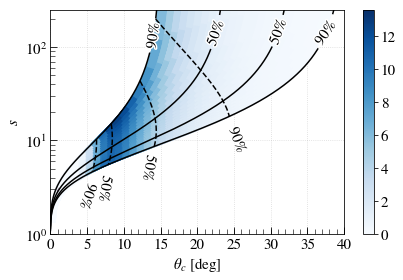

In [41]:
import matplotlib.patheffects as path_effects

# make a empty list for storing the first value of theta_obsGW to make the colorbar I want
# because the theta_obsGW gives highestt probability so that it has to be shown 
lc_list = []
P_theta_c_list = []
colors = []
theta_obsGW_list = np.arange(15, 41, 1)
for i in theta_obsGW_list: # loop with theta_obsGW
#for i in np.arange(15, 17, 1):
    theta_c_list = np.arange(1., i, 1.) # loop with theta_c
    # find the probablity density of theta_c, its median, 1sigma edges 
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    # fill P(theta_c) into the list 
    P_theta_c_list.append(P_theta_c)
    # integral of the probablity density of theta_c
    def int_P_theta_c(xstart, xend):
        '''
        input is left side of theta_c, and the right side of theta_c
        USAGE: color = int_P_theta_c(xstart=theta_c_left, xend=theta_c_right)
        '''
        out, err = integrate.quad(lambda x: P_theta_c(x), xstart, xend)
        return out
    # caluculate the probablity finding theta_c in the interval theta_c -> theta_c+delta theta_c
    # the values are used for the color 
    color = np.vectorize(int_P_theta_c)(xstart=theta_c_list[:-1], xend=theta_c_list[1:])
    # add theta_c = theta_obsGW - 0.01 to extend curve till the panel of the plot 
    theta_c_list = np.append(theta_c_list, [i-0.01])
    # calculate the probablity theta_c = [theta_obsGW-1, theta_obsGW], 
    # which is 1 - P(theta_c = [1, theta_obsGW-1])
    # create the correspoding color theta_c_list[0] = 1 deg, theta_c_list[-2] = theta_obsGW - 1 deg
    color_last = (1-np.vectorize(int_P_theta_c)(xstart=theta_c_list[0], xend=theta_c_list[-2]))
    # add colar last to the color list 
    color = np.append(color, color_last)
    # add theta_c = theta_obsGW - 0.01 to extend curve till the panel of the plot 
    theta_c_list = np.append(theta_c_list, [i-0.01])
    # I know theta_c < 1. P(theta_c) ~ e-30. Because of numerical error 
    # I add theta_c  =[0, 1] deg
    theta_c_list = np.append(np.arange(0.1, 1, 0.1), theta_c_list)
    # I add the color of theta_c = [0, 1] deg
    color = np.append([0.]*len(np.arange(0.1, 1, 0.1)), color)
    # add color vector to the list 
    colors.append(color)
    # convert the list of theta_c to the corresponding s 
    s_list = np.vectorize(find_s)(theta_c = theta_c_list, theta_obsGW = i)
    # curve for theta_obsGW confidence level with low-spin prior case 
    #lc = colorline(x=theta_clist, y=s_list, z=color, cmap='OrRd', linewidth=0.5, norm=None)
    # line color plot 
    #lc = colorline(x=theta_c_list, y=s_list, z=color, cmap='viridis', linewidth=1, norm=None)
    # make segments of the curve
    segments = make_segments(x=theta_c_list, y=s_list)
    # this needs to be uncommented to make a colorbar but it will be prevented from being shown 
    lc = mcoll.LineCollection(segments, array=100*color, cmap='Blues', norm=None)
    # store the object to the list defined on the top   
    lc_list.append(lc)
    # K.M modified the code such that the color is chosen manually consistent thoughtout each curve 
    color = (color-np.amin(colors[0]))/(np.amax(colors[0])-np.amin(colors[0]))
    for p, q in zip(segments, color):
        # chop the segment to make the width of the line SMOOTH
        # the sequece of chopped line of theta_c 
        # p[0,0] is the left and p[1,0] is the right points of theta_c
        chopped_theta_c = np.linspace(p[0,0], p[1,0], 10, endpoint=True)
        # the sequece of chopped line of s
        chopped_s = np.vectorize(find_s)(theta_c = chopped_theta_c, theta_obsGW = i)
        # make segments with chopped sequences
        chopped_segments = make_segments(x=chopped_theta_c, y=chopped_s)
        # plot for each chopped segment 
        # with color is in delta theta = 1 deg and the width is based on the sequece of the chopped segments
        # Note: p is in 1 deg 
        # Note: ele is in 0.1 deg
        if i != theta_obsGW_list[0] and i != theta_obsGW_list[-1]:
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Blues(q), linewidth=np.log(0.3*ele[1,1]*ele[1,0]))
        if i == theta_obsGW_list[1]:
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Blues(q), linewidth=np.log(0.8*ele[0,1]*ele[1,0]*ele[0,1]))
        if i == theta_obsGW_list[-2] or i == theta_obsGW_list[-3] :
            for ele in chopped_segments: # drow line for chopped segement
                plt.plot(ele[:,0], ele[:,1], color=cm.Blues(q), linewidth=np.log(0.0001*ele[0,1]**3*ele[1,0]))  

# # fill the area of theta_c = [0.1, 1] to be dark due to plot mulfunction 
# it is supposed to be dark the line plot above
theta_c_list_fill = np.linspace(0.1, 1.1, 10, endpoint=True)
s_fill_up = np.vectorize(find_s)(theta_c = theta_c_list_fill, theta_obsGW = 15)
s_fill_down = np.vectorize(find_s)(theta_c = theta_c_list_fill, theta_obsGW = 40)
plt.fill_between(theta_c_list_fill, s_fill_down, s_fill_up, facecolor=cm.viridis(0.), alpha=1.)


#plot the color bar when theta_obsGW = 15 deg
h = plt.colorbar(lc_list[0]) 
h.ax.tick_params(labelsize=15) 
# write the label for the color bar
#h.set_label(r'Probablity in $\Delta\theta_c = 1.0^\circ$ [%]', fontsize=12)



def make_line_text(x_lt, y_lt, linecolor, linestyle, locx, locy, text, textcolor, cut, cut_ind, tilt):
    '''
    input: 
        x_lt: the list of the x values
        y_lt: the list of the y values
        linecolor: the color of the curve
        linestyle: the style of the curve {'-', '--', ':'}
        locx: the x coordinate for the test 
        locy: the y corrdinate for the test
        text: the text (90\%, 50\%)
        textcolor: the color of the text 
        cut: if the cut is applied (y), not (n)
        cut_ind: the index window for the cut 
        tilt: the angle for the tilt of the text
    '''
    # the find the index of x_lt having locx
    try:
        itemindex = np.argwhere((x_lt< locx+0.05) & (x_lt> locx-0.05))[0][0]
    except IndexError:
        pass 
    if cut == 'n': # without the cut 
        plt.plot(x_lt, y_lt, c=linecolor, ls=linestyle) # plot a curve
    elif cut == 'y':# with the cut 
        # plot curves 
        plt.plot(x_lt[:itemindex-cut_ind], y_lt[:itemindex-cut_ind], c=linecolor, ls=linestyle) # plot a curve
        plt.plot(x_lt[itemindex+cut_ind:], y_lt[itemindex+cut_ind:], c=linecolor, ls=linestyle) # plot a curve
    # find the tilt angle for the text in degree
    # note that y scale is log10 scale and convert it in rad to it in deg
    #angle = np.arctan(np.log10(y_lt[itemindex+1]/y_lt[itemindex])/(x_lt[itemindex+1]-x_lt[itemindex]))
    # plot a text 
    t = plt.text(locx, locy, r'$\mathcal{%s}$'%text, color=textcolor, rotation=tilt, style = 'oblique', ha='center', va='center', size=15)
    t.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                           path_effects.Normal()]) 

    return 


# 90% theta_obsGW = 40 deg
theta_o = 40
theta_c_lt = np.arange(0.01, theta_o, 0.05)
s_lt = np.vectorize(find_s)(theta_c = theta_c_lt, theta_obsGW = theta_o)
theta_c = 37.5
s = find_s(theta_c=theta_c,theta_obsGW=theta_o)+4
make_line_text(theta_c_lt, s_lt, 'black', '-', theta_c, s, '90\%', 'black', 'y', 20, 55)

# 90% theta_obsGW = 15 deg
theta_o = 15
theta_c_lt = np.arange(0.01, theta_o, 0.05)
s_lt = np.vectorize(find_s)(theta_c = theta_c_lt, theta_obsGW = theta_o)
theta_c = 14
s = find_s(theta_c=theta_c,theta_obsGW=theta_o)+4
make_line_text(theta_c_lt, s_lt, 'black', '-', theta_c, s, '90\%', 'black', 'y', 8, 82)

# 50% theta_obsGW = 24 deg
theta_o = 24
theta_c_lt = np.arange(0.01, theta_o, 0.05)
s_lt = np.vectorize(find_s)(theta_c = theta_c_lt, theta_obsGW = theta_o)
theta_c = 22.5
s = find_s(theta_c=theta_c,theta_obsGW=theta_o)+4
make_line_text(theta_c_lt, s_lt, 'black', '-', theta_c, s, '50\%', 'black', 'y', 12, 70)

# 50% theta_obsGW = 33 deg
theta_o = 33
theta_c_lt = np.arange(0.01, theta_o, 0.05)
s_lt = np.vectorize(find_s)(theta_c = theta_c_lt, theta_obsGW = theta_o)
theta_c = 31
s = find_s(theta_c=theta_c,theta_obsGW=theta_o)+4
make_line_text(theta_c_lt, s_lt, 'black', '-', theta_c, s, '50\%', 'black', 'y', 15, 70)


# plot the confidence curve 
# with 90% and 50% confidenc level  
low_bd90_theta_c_lt =  np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.05)
high_bd90_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.95)
low_bd50_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.25)
high_bd50_theta_c_lt = np.vectorize(confidential_theta_c)(P_theta_c_list, theta_obsGW_list, 0.75)
low_bd90_s_lt = np.vectorize(find_s)(low_bd90_theta_c_lt, theta_obsGW_list)
high_bd90_s_lt = np.vectorize(find_s)(high_bd90_theta_c_lt, theta_obsGW_list)
low_bd50_s_lt = np.vectorize(find_s)(low_bd50_theta_c_lt, theta_obsGW_list)
high_bd50_s_lt = np.vectorize(find_s)(high_bd50_theta_c_lt, theta_obsGW_list)



make_line_text(low_bd90_theta_c_lt, low_bd90_s_lt, 'black', '--', 5.1, 2.5, '90\%', 'black', 'n', 8, -110)
make_line_text(high_bd90_theta_c_lt, high_bd90_s_lt, 'black', '--', 25.5, 10, '90\%', 'black', 'n', 8, -70)
make_line_text(low_bd50_theta_c_lt, low_bd50_s_lt, 'black', '--', 7.5, 3, '50\%', 'black', 'n', 8, -100)
make_line_text(high_bd50_theta_c_lt, high_bd50_s_lt, 'black', '--', 13.5, 5, '50\%', 'black', 'n', 8, -100)


plt.yscale('log')
plt.xlim(0, 40)
plt.ylim(1, 250)
plt.xlabel(r'$\theta_c$ [deg]', fontsize=15)
plt.ylabel(r'$s$', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
plt.tight_layout()
plt.grid(ls=':', alpha=0.5)
plt.savefig('theta_cVersusS.pdf')
plt.show()





In [62]:
np.amax(colors[0])

TypeError: 'function' object has no attribute '__getitem__'

# plot the probability density of $\theta_c$ and $s$ with color of PDF of $\theta_{obs}^{GW}$

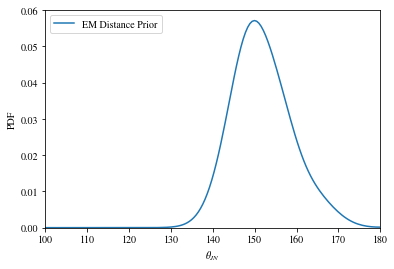

yes. OK!
now it is ready


In [13]:
dir ='/Users/kentaromogushi/Documents/department/research/shortgamma/chi/Obtain_chi/Allobtain/swiftdata/GW170817property'
YY = np.loadtxt(dir+'/figure_4/dist_grid_pts.dat.gz')
# Grid points in distance and inclination (theta_jn)
XX = np.loadtxt(dir+'/figure_4/incl_grid_pts.dat.gz')
YY = np.loadtxt(dir+'/figure_4/dist_grid_pts.dat.gz')

# Posterior PDF values for the marginal distributions shown in Figure 4
gw_Z = np.loadtxt(dir+'/figure_4/volumetric_marginal_posterior_pdf.dat.gz')
em_Z = np.loadtxt(dir+'/figure_4/em_dist_prior_marginal_posterior_pdf.dat.gz')

# Extract the 1-D grids for 1-D marginal distribution plots
theta_jns = XX[0, :]
d_theta_jn = theta_jns[1] - theta_jns[0]
dists = YY[:, 0]
d_dist = dists[1] - dists[0]

plt.plot(theta_jns, d_dist*np.sum(em_Z, axis=0), label='EM Distance Prior')
plt.xlim(theta_jns[0], theta_jns[-1])
plt.ylim(ymin=0)
plt.legend(loc='upper left')

plt.xlabel(r'$\theta_{JN}$')
plt.ylabel('PDF');
plt.show()
print('yes. OK!')


from scipy.interpolate import interp1d
# interpolte pdf of theta_jn
f = interp1d(theta_jns, d_dist*np.sum(em_Z, axis=0)) 

print('now it is ready')



/Users/kentaromogushi/virtenv/python2-dir/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


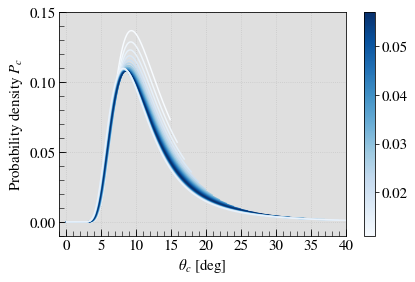

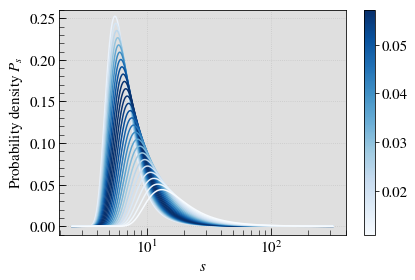

In [14]:
#print('Hey user hit 6!')
#df = pickRF(data_matrix)   



# theta_obsGW vector 
theta_obsGW = np.arange(15, 41, 1) 
# make a dumy segments to make a colorbar
# make segments of the curve
segments = make_segments(x=theta_obsGW, y=theta_obsGW)
# make a color vector, which is the probability density of theta_obsGW
color = np.vectorize(f)(180.-theta_obsGW)
# this needs to be uncommented to make a colorbar but it will be prevented from being shown 
lc = mcoll.LineCollection(segments, array=color, cmap='Blues', norm=None)



# for theta_c
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for color_ind, i in enumerate(theta_obsGW, 1):
    label = '%i'%i
    #P, med_theta_c, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_theta_c, med_theta_c, low_bd_theta_c, upp_bd_theta_c = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    # the list of theta_c
    theta_c = np.arange(1., i, 0.1)
    # the list of probability density 
    P = P_theta_c(theta_c)
    # I know theta_c < 1. P(theta_c) ~ e-30. Because of numerical error 
    # I add theta_c  =[0, 1] deg
    theta_c = np.append(np.arange(0.1, 1, 0.1), theta_c)
    # I add the corresponding P(theta_c)
    P = np.append([0.]*len(np.arange(0.1, 1, 0.1)), P)
    # make the color number such as to match the colorbar
    iro = (f(180.-i)-np.amin(color))/(np.amax(color)-np.amin(color))
    # plot 
    #plt.plot(theta_c, P, color='b', ls='-', alpha=10*f(180-i) ,label=label)
    h = plt.plot(theta_c, P, color=cm.Blues(iro), ls='-' ,label=label)
    #plt.axvline(med_theta_c, color=cm.plasma(iro), linestyle='--')
    #print(r'theta_c = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_theta_c, (med_theta_c-low_bd_theta_c), (upp_bd_theta_c-med_theta_c), i))
#ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
#plt.legend(ncol=3, title=r'$\theta_{obs}^{GW}$ [degs]')
#plt.title(r'Probability versus $\theta_c$, Hopkins RF, 1Gyr', fontsize=15)
h = plt.colorbar(lc)
h.ax.tick_params(labelsize=15) 
#h.set_label(r'$\vartheta_{obs}$ probablity density', fontsize=12)
plt.grid(ls=':', alpha=0.5)
plt.xlabel(r'$\theta_c$ [deg]', fontsize=15)
plt.ylabel(r'Probability density $P_c$', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(0.05))
plt.axes().yaxis.set_minor_locator(MultipleLocator(0.01))
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_minor_locator(MultipleLocator(1))
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins1GyrTheta_c.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.tight_layout()
plt.xlim(-1, 40)
plt.ylim(-0.01, 0.15)
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.25)
plt.savefig('ProBrokenHopkins1GyrTheta_c.pdf')
plt.show()


# for s
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for color_ind, i in enumerate(theta_obsGW[::-1],1):
    label = '%i'%i
    #P, theta_c_max, theta_c_lower, theta_c_upper = distribution_theta_c(df, '1Gyr', theta_obsGW=i)
    P_s, med_s, low_bd_s, upp_bd_s = distribution_s(df, '1Gyr', theta_obsGW=i)
    # the list of s
    s = np.logspace(0.4, 2.5, 300)
    # the list of P(s)
    P = P_s(s)
    # make the color number such as to match the colorbar
    iro = (f(180.-i)-np.amin(color))/(np.amax(color)-np.amin(color))
    # plot 
    #plt.plot(s, P, color='b', linestyle='-', alpha=10*f(180-i), label=label)
    plt.plot(s, P, color=cm.Blues(iro), linestyle='-', label=label)
    #plt.axvline(med_s, color=cm.plasma(iro), linestyle='--')
    #print(r's = %.1f - %.1f + %.1f @ theta_obsGW = %i' % (med_s, (med_s-low_bd_s), (upp_bd_s-med_s),i))
#ax = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),  ncol=2, shadow=True, title=r'$\theta_{obs}^{GW}$ [degs]', fancybox=True)
#plt.legend(ncol=3, title=r'$\theta_{obs}^{GW}$ [degs]')
h=plt.colorbar(lc)
h.ax.tick_params(labelsize=15) 
#h.set_label(r'$\vartheta_{obs}$ probablity density', fontsize=12)
plt.grid(ls=':', alpha=0.5)
plt.xscale('log')
#plt.title(r'Probability versus $s$, Hopkins RF, 1Gyr', fontsize=15)
plt.xlabel(r'$s$', fontsize=15)
plt.ylabel(r'Probability density $P_s$', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.axes().yaxis.set_major_locator(MultipleLocator(0.05))
plt.axes().yaxis.set_minor_locator(MultipleLocator(0.01))
plt.axes().yaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().yaxis.set_tick_params(which='minor', right = False, length=5)
plt.axes().xaxis.set_tick_params(which='major', right = False, length=7)
plt.axes().xaxis.set_tick_params(which='minor', right = False, length=5)
plt.tick_params(which='both', direction='in')
#plt.savefig('ProBrokenHopkins1GyrS.pdf', bbox_extra_artists=(ax,), bbox_inches='tight')
plt.ylim(-0.01, 0.26)
plt.tight_layout()
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.25)
plt.savefig('ProBrokenHopkins1GyrS.pdf')
plt.show()



### just checking the code 

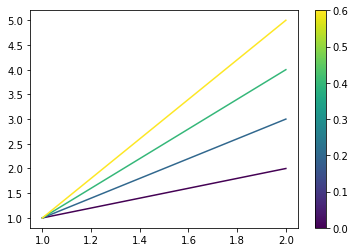

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

min, max = (-40, 30)
step = 10

# Setting up a colormap that's a simple transtion
#mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

theta_c_list = np.linspace(0, 4, 4)
s_list = np.linspace(0, 4, 4)
Z = np.array([0, 0.2, 0.4, 0.6])
# make segments of the curve
segments = make_segments(x=theta_c_list, y=s_list)

# this needs to be uncommented to make a colorbar but it will be prevented from being shown 
lc = mcoll.LineCollection(segments, array=Z, cmap='viridis', norm=None)
plt.clf()

# Plotting what I actually want
X=[[1,2],[1,2],[1,2],[1,2]]
Y=[[1,2],[1,3],[1,4],[1,5]]

for x,y,z in zip(X,Y,Z):
    # setting rgb color based on z normalized to my range
    r = (z-np.amin(Z))/(np.amax(Z)-np.amin(Z))
    g = 0
    b = 1-r
    plt.plot(x,y,color=cm.viridis(r))       
        
plt.colorbar(lc) # using the colorbar info I got from contourf
#plt.savefig('test.pdf')
plt.show()

# find the local rate densities for the Hernquist RF

In [77]:
print('Hey user hit 2!')
df = pickRF(data_matrix)   
    
def LRD_theta_c(df, tmin, theta_obsGW, r_nsns=r_nsns):
    '''
    Providing local rate density for a theta_c with given df, t_min, theta_obsGW
    USAGE: LRD_ave, LRD_std = distribution_theta_c(df, '1Gyr', theta_obsGW=29.)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. give the average local rate density as a function of  a theta_c
    3. give the standard deviation of local rate density as a function of a theta_c
    '''
    # VT for NSNS in O2
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    #r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()
    # the NSNS standard deviation events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    edata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDstd']*r_nsns*VT).values.tolist()


   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

   
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events l as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit_ave = curve_fit(model, xdata, ydata)  # fitting for average value 
    fit_std = curve_fit(model, xdata, edata)  # fitting for standard deviation value 

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best_ave(x, a=fit_ave[0][0], b=fit_ave[0][1], c=fit_ave[0][2], d=fit_ave[0][3], e=fit_ave[0][4], f=fit_ave[0][5]):
        '''
        The phenominological model for local rate density as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)
    
    
    def model_best_std(x, a=fit_std[0][0], b=fit_std[0][1], c=fit_std[0][2], d=fit_std[0][3], e=fit_std[0][4], f=fit_std[0][5]):
        '''
        The phenominological model for local rate density STANDARD DEVIATION as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)

    return model_best_ave, model_best_std

    




Hey user hit 2!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:72


In [78]:
print('Hernquist RF')
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.6), LRD_std(12.6), 12.6))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.6+6.7), LRD_std(12.6+6.7), 12.6+6.7))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(12.6-3.9), LRD_std(12.6-3.9), 12.6-3.9))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(12.4), LRD_std(12.4), 12.4))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(12.4+6.7), LRD_std(12.4+6.7), 12.4+6.7))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(12.4-3.8), LRD_std(12.4-3.8), 12.4-3.8))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(12.4), LRD_std(12.4), 12.4))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(12.4+6.7), LRD_std(12.4+6.7), 12.4+6.7))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(12.4-3.8), LRD_std(12.4-3.8), 12.4-3.8))





Hernquist RF
LRD = 2332 +/- 1161 at theta_c = 12.6 @ t_m = 1Gyr
LRD = 1118 +/- 555 at theta_c = 19.3 @ t_m = 1Gyr
LRD = 4453 +/- 2220 at theta_c = 8.7 @ t_m = 1Gyr
--------------------------------------------------
LRD = 2349 +/- 1171 at theta_c = 12.4 @ t_m = 100Myr
LRD = 1115 +/- 555 at theta_c = 19.1 @ t_m = 100Myr
LRD = 4454 +/- 2225 at theta_c = 8.6 @ t_m = 100Myr
--------------------------------------------------
LRD = 2341 +/- 1168 at theta_c = 12.4 @ t_m = 20Myr
LRD = 1111 +/- 553 at theta_c = 19.1 @ t_m = 20Myr
LRD = 4439 +/- 2219 at theta_c = 8.6 @ t_m = 20Myr


In [79]:
print('Hey user hit 6!')
df = pickRF(data_matrix)   
    
def LRD_theta_c(df, tmin, theta_obsGW, r_nsns=r_nsns):
    '''
    Providing local rate density for a theta_c with given df, t_min, theta_obsGW
    USAGE: LRD_ave, LRD_std = distribution_theta_c(df, '1Gyr', theta_obsGW=29.)
    (method)
    for theta_c
    1. Extrapolate the number of NSNS events in O2, l, as a functiono of theta_c
    2. give the average local rate density as a function of  a theta_c
    3. give the standard deviation of local rate density as a function of a theta_c
    '''
    # VT for NSNS in O2
    VT = 9.1*10**(-4)
    # fraction of NSNS to NSNS + NSBH 
    #r_nsns = 5./6.
    
    
    # determine which tmin
    if tmin == '1Gyr':
        tmin_num = '1'
    elif tmin == '100Myr':
        tmin_num = '2'
    elif tmin == '20Myr':
        tmin_num = '3'
    
    #======================================
    # getting the values of theta_c and the number of NSNS events in O2
    #======================================
    
    # the theta_c data series, theta_c starts with 0.1 degs
    xdata = df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['theta_c'].values.tolist()
    # the NSNS average events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    ydata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDmean']*r_nsns*VT).values.tolist()
    # the NSNS standard deviation events number in O2, 5/6 comes from the fraction of NSNS population to the combined one, 9.1*10**(-4) is VT in O2
    edata = (df[(df['label_tmin']==tmin_num) & (df['theta_obsGW']==theta_obsGW)]['LRDstd']*r_nsns*VT).values.tolist()


   
    #+++++++++++++++++++++++++++++++++++++
    # functions for evaluating the error |
    #+++++++++++++++++++++++++++++++++++++

   
    def model(x, a, b, c, d, e, f):
        '''
        The phenominological model for NSNS events l as a function of theta_c
        '''
        return a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3

    #++++++++++++
    # fitting!  |
    #++++++++++++

    fit_ave = curve_fit(model, xdata, ydata)  # fitting for average value 
    fit_std = curve_fit(model, xdata, edata)  # fitting for standard deviation value 

    #++++++++++++++++++++++
    # bestfitted function |
    #++++++++++++++++++++++
    
    def model_best_ave(x, a=fit_ave[0][0], b=fit_ave[0][1], c=fit_ave[0][2], d=fit_ave[0][3], e=fit_ave[0][4], f=fit_ave[0][5]):
        '''
        The phenominological model for local rate density as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)
    
    
    def model_best_std(x, a=fit_std[0][0], b=fit_std[0][1], c=fit_std[0][2], d=fit_std[0][3], e=fit_std[0][4], f=fit_std[0][5]):
        '''
        The phenominological model for local rate density STANDARD DEVIATION as a function of theta_c
        as l = r_nsns*VT*LRD
        '''
        return (a/x + b/x**2 +  c*x + d*np.exp(-e*x) + f/x**3)/(r_nsns*VT)

    return model_best_ave, model_best_std

    





Hey user hit 6!
which RF? Hernquist:2, Porciani:3, Fardal:4, Cole:5, Hopkins:6, Wilkins:76


In [80]:
print('Hopkins RF')
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(10.7), LRD_std(10.7), 10.7))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(10.7+6.1), LRD_std(10.7+6.1), 10.7+6.1))
LRD_ave, LRD_std = LRD_theta_c(df, '1Gyr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 1Gyr' % (LRD_ave(10.7-3.3), LRD_std(10.7-3.3), 10.7-3.3))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(9.6), LRD_std(9.6), 9.6))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(9.6+5.6), LRD_std(9.6+5.6), 9.6+5.6))
LRD_ave, LRD_std = LRD_theta_c(df, '100Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 100Myr' % (LRD_ave(9.6-3.0), LRD_std(9.6-3.0), 9.6-3.0))
print('-'*50)
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(9.2), LRD_std(9.2), 9.2))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(9.2+5.4), LRD_std(9.2+5.4), 9.2+5.4))
LRD_ave, LRD_std = LRD_theta_c(df, '20Myr', theta_obsGW=29.)
print('LRD = %.f +/- %.f at theta_c = %.1f @ t_m = 20Myr' % (LRD_ave(9.2-2.9), LRD_std(9.2-2.9), 9.2-2.9))






Hopkins RF
LRD = 2281 +/- 1153 at theta_c = 10.7 @ t_m = 1Gyr
LRD = 1042 +/- 526 at theta_c = 16.8 @ t_m = 1Gyr
LRD = 4367 +/- 2212 at theta_c = 7.4 @ t_m = 1Gyr
--------------------------------------------------
LRD = 2280 +/- 1165 at theta_c = 9.6 @ t_m = 100Myr
LRD = 1020 +/- 521 at theta_c = 15.2 @ t_m = 100Myr
LRD = 4422 +/- 2262 at theta_c = 6.6 @ t_m = 100Myr
--------------------------------------------------
LRD = 2258 +/- 1158 at theta_c = 9.2 @ t_m = 20Myr
LRD = 1003 +/- 514 at theta_c = 14.6 @ t_m = 20Myr
LRD = 4410 +/- 2265 at theta_c = 6.3 @ t_m = 20Myr


### sanity check of interpolated the average LRD and the standard deviation of LRD

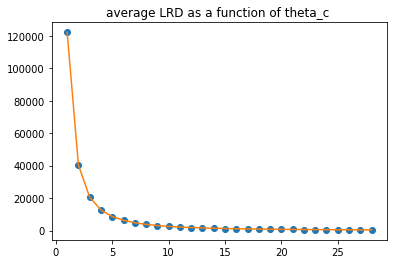

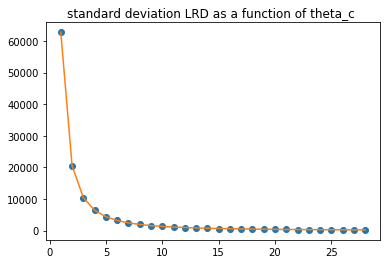

In [76]:
plt.plot(theta_c_lt, LRD_ac, 'o')
plt.plot(theta_c_lt, np.vectorize(LRD_ave)(theta_c_lt))
plt.title('average LRD as a function of theta_c ')
plt.show()

plt.plot(theta_c_lt, er_lt, 'o')
plt.plot(theta_c_lt, np.vectorize(LRD_std)(theta_c_lt))
plt.title('standard deviation LRD as a function of theta_c ')
plt.show()

